In [9]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pylab as plt
from torchvision import datasets, transforms

In [34]:
datasets.MNIST?

Init signature:
datasets.MNIST(
    root,
    train=True,
    transform=None,
    target_transform=None,
    download=False,
)
Docstring:     
`MNIST <http://yann.lecun.com/exdb/mnist/>`_ Dataset.

Args:
    root (string): Root directory of dataset where ``processed/training.pt``
        and  ``processed/test.pt`` exist.
    train (bool, optional): If True, creates dataset from ``training.pt``,
        otherwise from ``test.pt``.
    download (bool, optional): If true, downloads the dataset from the internet and
        puts it in root directory. If dataset is already downloaded, it is not
        downloaded again.
    transform (callable, optional): A function/transform that  takes in an PIL image
        and returns a transformed version. E.g, ``transforms.RandomCrop``
    target_transform (callable, optional): A function/transform that takes in the
        target and transforms it.
File:           /opt/conda/lib/python3.6/site-packages/torchvision/datasets/mnist.py
Type:           t

In [31]:
transform = transforms.ToTensor()

trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST('MNIST_data/', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [32]:
data_iter = iter(trainloader)
images, labels = data_iter.next()
print(type(images))
print(images.shape, labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28]) torch.Size([64])


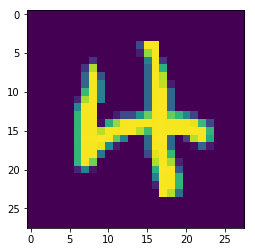

In [33]:
plt.imshow(images[1].numpy().squeeze())

In [38]:
def activation(x):
    return 1/(1+torch.exp(-x))

inputs = images.view(images.shape[0], -1)
print(images.shape, inputs.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64, 784])


In [39]:
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)
out = torch.mm(h, w2) + b2     # 属于各个数字的分布

In [48]:
print(out.shape, labels.shape)
print("labels: ", labels[:4])
out[:4]   # 没有经过训练，分布还对应不上

torch.Size([64, 10]) torch.Size([64])
labels:  tensor([2, 4, 8, 4])


tensor([[  0.3913, -12.5249,   7.6558,  -9.5013,   4.7528,  -3.1489, -16.7274,
           6.7377,   2.1634,  -6.4114],
        [ -9.7542, -15.7317,  16.6697, -12.3902,  -1.6166,  -7.1777,  -7.4016,
          10.9677,   7.3043,  -8.9195],
        [ -2.2503,   0.5217,   2.3960,  -8.8337,  -2.0826,  -3.5904, -19.4348,
           4.9641,   0.7638, -12.3266],
        [-13.3044, -19.4099,   4.5646,  -5.7069,  -0.5667,  -4.4339, -10.3709,
           2.6410,   6.4628, -12.0158]])

In [50]:
def softmax(x):
    return torch.exp(x) / torch.sum(torch.exp(x), dim=1).view(-1, 1)

# 计算概率
probs = softmax(out)
print(probs[:4])
print(probs.shape, probs.sum(dim=1))

tensor([[4.7977e-04, 1.1792e-09, 6.8541e-01, 2.4250e-08, 3.7601e-02, 1.3917e-05,
         1.7638e-11, 2.7368e-01, 2.8223e-03, 5.3289e-07],
        [3.3324e-12, 8.4487e-15, 9.9659e-01, 2.3875e-13, 1.1400e-08, 4.3826e-11,
         3.5034e-11, 3.3281e-03, 8.5345e-05, 7.6788e-12],
        [6.6587e-04, 1.0647e-02, 6.9378e-02, 9.2096e-07, 7.8742e-04, 1.7433e-04,
         2.2922e-11, 9.0478e-01, 1.3564e-02, 2.8010e-08],
        [2.2185e-09, 4.9487e-12, 1.2778e-01, 4.4220e-06, 7.5507e-04, 1.5793e-05,
         4.1694e-08, 1.8666e-02, 8.5278e-01, 8.0484e-09]])
torch.Size([64, 10]) tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000

In [59]:
from torch import nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # 输入768特征，输出特征256
        self.hidden = nn.Linear(768, 256)
        self.output = nn.Linear(256, 10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forword(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        # x = F.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        # x = F.softmax(x, dim=1)
        return x

In [60]:
model = Network()
model

Network(
  (hidden): Linear(in_features=768, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [64]:
model = nn.Sequential(nn.Linear(768, 256),
                      nn.ReLU(),
                      nn.Linear(256, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
model

Sequential(
  (0): Linear(in_features=768, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)

In [65]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
logits = model(images)
loss = criterion(logits, labels)
loss

RuntimeError: size mismatch, m1: [64 x 784], m2: [768 x 256] at /opt/conda/conda-bld/pytorch-cpu_1549626403278/work/aten/src/TH/generic/THTensorMath.cpp:940